<a href="https://colab.research.google.com/github/carolguerra139-bit/TC4/blob/main/GradientBoosting_IMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# 2. carregar o dataset
df = pd.read_csv('/content/Obesity.csv')


# 2.1 Criar coluna BMI (IMC)
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

In [ ]:
print(df.head())

   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity        BMI  
0        Normal_Weight  24.386526  
1        Normal_Weight  24.238227  
2        Normal_Weight  23

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
 17  BMI             2111 non-null   f

In [ ]:
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE          BMI  
count  2111.000000  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866    29.700159  
std       0.612953     0.850592     0.608927     8.011337  
min       1.000000     0.000000     0.000000    12.998685  
25%       1.584812     0.124505  

In [ ]:
print(df.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity', 'BMI'],
      dtype='object')


In [ ]:
df['Obesity'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
np.unique(df['Obesity'], return_counts=True)

(array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
        'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
        'Overweight_Level_II'], dtype=object),
 array([272, 287, 351, 297, 324, 290, 290]))

In [ ]:
# separar features e target
X = df.drop('Obesity', axis=1)
y = df['Obesity']

# identificar colunas categóricas e numéricas
num_features = ['Age', 'Height', 'Weight', 'BMI']

cat_features = [col for col in X.columns if col not in num_features]


# pré-processamento
preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])

# split fixo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Modelo 1: Gradient Boosting
# ---------------------------
gb = Pipeline([
    ('prep', preprocess),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Treinar
gb.fit(X_train, y_train)

# Predições
gb_preds_test = gb.predict(X_test)
gb_preds_train = gb.predict(X_train)

# Avaliar modelo
print(classification_report(y_test, gb_preds_test))

# Acurácias
gb_acc_test = accuracy_score(y_test, gb_preds_test)
gb_acc_train = accuracy_score(y_train, gb_preds_train)

print("Acurácia (TREINO) - Gradient Boosting:", round(gb_acc_train, 4))
print("Acurácia (TESTE)  - Gradient Boosting:", round(gb_acc_test, 4))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        54
      Normal_Weight       0.95      1.00      0.97        58
     Obesity_Type_I       0.99      1.00      0.99        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.98      0.95      0.96        58
Overweight_Level_II       0.98      0.97      0.97        58

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423

Acurácia (TREINO) - Gradient Boosting: 1.0
Acurácia (TESTE)  - Gradient Boosting: 0.9835


In [ ]:
# Modelo 2: Naive Bayes
# ---------------------------
nb = Pipeline([
    ('prep', preprocess),
    ('model', GaussianNB())
])
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
print(classification_report(y_test, nb_preds))
nb_acc = accuracy_score(y_test, nb_preds)
print("Acurácia - Naive Bayes:", round(nb_acc, 4))

                     precision    recall  f1-score   support

Insufficient_Weight       0.76      1.00      0.86        54
      Normal_Weight       0.69      0.50      0.58        58
     Obesity_Type_I       0.83      0.50      0.62        70
    Obesity_Type_II       0.46      0.92      0.61        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.75      0.66      0.70        58
Overweight_Level_II       0.59      0.34      0.43        58

           accuracy                           0.70       423
          macro avg       0.73      0.70      0.69       423
       weighted avg       0.73      0.70      0.69       423

Acurácia - Naive Bayes: 0.6974


<Figure size 1000x800 with 0 Axes>

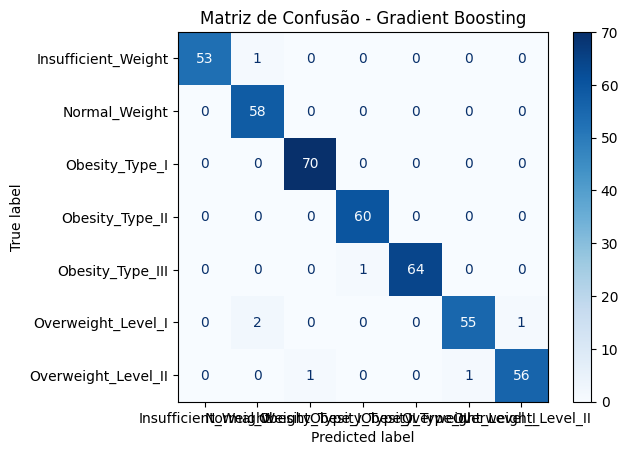

In [ ]:
# Gradient Boosting Matriz confusão
# -----------------------
gb_cm = confusion_matrix(y_test, gb_preds_test)
disp = ConfusionMatrixDisplay(confusion_matrix=gb_cm, display_labels=gb.classes_)
plt.figure(figsize=(10, 8))
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusão - Gradient Boosting")
plt.show()

In [ ]:
# pegar o modelo dentro do pipeline
gb_model = gb.named_steps['model']

# pegar nomes das features
feature_names = gb.named_steps['prep'].get_feature_names_out()

# pegar importâncias
importances = gb_model.feature_importances_

# ordenar
feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feat_imp.head(10)



,feature,importance
31,num__BMI,0.870356
0,cat__Gender_Female,0.070661
25,num__Weight,0.021256
1,cat__Gender_Male,0.015139
16,cat__CALC_Sometimes,0.005072
27,num__NCP,0.003079
24,num__Height,0.003064
26,num__FCVC,0.002298
23,num__Age,0.002056
17,cat__CALC_no,0.001375


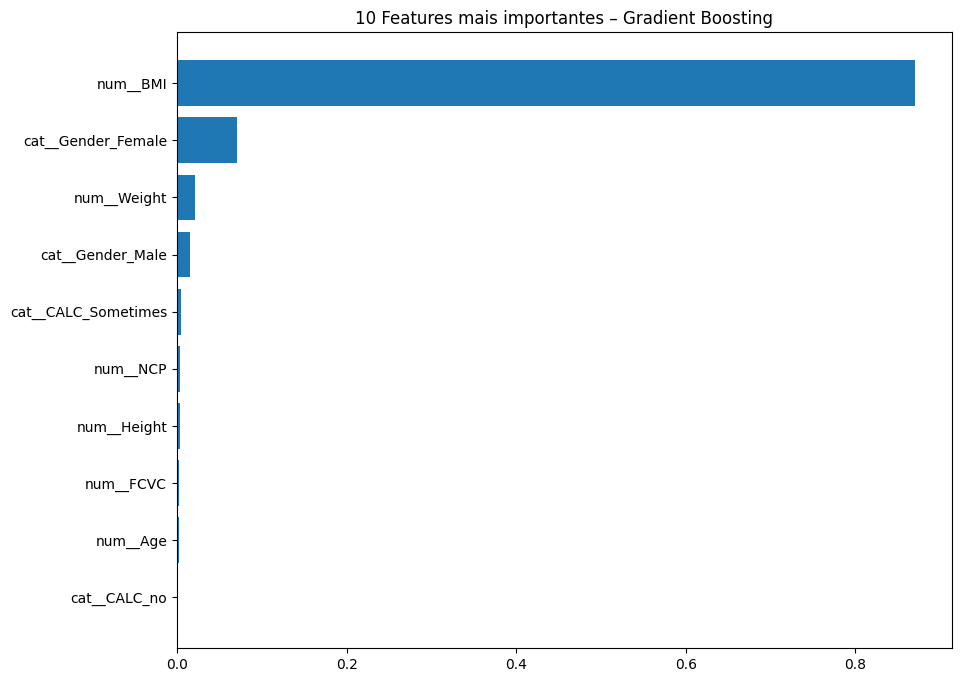

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(feat_imp['feature'].head(10), feat_imp['importance'].head(10))
plt.gca().invert_yaxis()
plt.title("10 Features mais importantes – Gradient Boosting")
plt.show()
